## MIMIC-III dataset
MIMIC-III (Medical Information Mart for Intensive Care) is a publicly available database containing deidentified health-related data for ICU patients. This database consists of 26 tables and includes information about over forty thousand patients who stayed in critical care units at the Beth Israel Deaconess Medical Center between 2001 and 2012. The data encompasses demographics, laboratory test results, procedures, medications, caregiver notes, and imaging reports.


#### Tables Related to Patient Stays:
- **ADMISSIONS**: Every unique hospitalization for each patient in the database (defines HADM_ID)
- **CALLOUT**: Information regarding when a patient was cleared for ICU discharge and when the patient was actually discharged
- **ICUSTAYS**: Every unique ICU stay in the database (defines ICUSTAY_ID)
- **PATIENTS**: Every unique patient in the database (defines SUBJECT_ID)
- **SERVICES**: The clinical service under which a patient is registered
- **TRANSFERS**: Patient movement from bed to bed within the hospital, including ICU admission and discharge


####  Tables Containing Critical Care Unit Data:
- **CAREGIVERS**: Every caregiver who has recorded data in the database (defines CGID)
- **CHARTEVENTS**: All charted observations for patients
- **DATETIMEEVENTS**: All recorded observations which are dates, for example time of dialysis or insertion of lines
- **INPUTEVENTS_CV**: Intake for patients monitored using the Philips CareVue system while in the ICU
- **INPUTEVENTS_MV**: Intake for patients monitored using the iMDSoft Metavision system while in the ICU
- **NOTEEVENTS**: Deidentified notes, including nursing and physician notes, ECG reports, imaging reports, and discharge summaries
- **OUTPUTEVENTS**: Output information for patients while in the ICU
- **PROCEDUREEVENTS_MV**: Patient procedures for the subset of patients who were monitored in the ICU using the iMDSoft MetaVision system

  
#### Tables Related to Hospital Record Systems:
- **CPTEVENTS**: Procedures recorded as Current Procedural Terminology (CPT) codes
- **DIAGNOSES_ICD**: Hospital assigned diagnoses, coded using the International Statistical Classification of Diseases and Related Health Problems (ICD) system
- **DRGCODES**: Diagnosis Related Groups (DRG), which are used by the hospital for billing purposes
- **LABEVENTS**: Laboratory measurements for patients both within the hospital and in outpatient clinics
- **MICROBIOLOGYEVENTS**: Microbiology measurements and sensitivities from the hospital database
- **PRESCRIPTIONS**: Medications ordered, and not necessarily administered, for a given patient
- **PROCEDURES_ICD**: Patient procedures, coded using the International Statistical Classification of Diseases and Related Health Problems (ICD) system


#### Dictionary Tables:
- **D_CPT**: High-level dictionary of Current Procedural Terminology (CPT) codes
- **D_ICD_DIAGNOSES**: Dictionary of International Statistical Classification of Diseases and Related Health Problems (ICD) codes relating to diagnoses
- **D_ICD_PROCEDURES**: Dictionary of International Statistical Classification of Diseases and Related Health Problems (ICD) codes relating to procedures
- **D_ITEMS**: Dictionary of ITEMIDs appearing in the MIMIC database, except those that relate to laboratory tests
- **D_LABITEMS**: Dictionary of ITEMIDs in the laboratory database that relate to laboratory tests



### Data Extraction for 10,000 Patients
To extract data at the patient level, two datasets are created for each table based on unique identifier, SUBJECT_ID. 

Creating Two Datasets:
1. First 10,000 SUBJECT_IDs: ‘TABLE_sorted.csv’
2. Random 10,000 SUBJECT_IDs: ‘TABLE_random.csv’


## Dependencies

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 20)

## 1. Patient Stays

In [2]:
base_path = "/kaggle/input/mimic-iii-10k/MIMIC -III (10000 patients)"

In [3]:
admissions = pd.read_csv(os.path.join(base_path, "ADMISSIONS/ADMISSIONS_sorted.csv"))
admissions.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,1,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,NOT SPECIFIED,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
1,2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
2,3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME WITH HOME IV PROVIDR,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
3,4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,NaN,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,NaN,BUDDHIST,NaN,ASIAN,NaN,NaN,NEWBORN,0,1
4,5,6,107064,2175-05-30 07:15:00,2175-06-15 16:00:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,CHRONIC RENAL FAILURE/SDA,0,1


In [4]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12911 entries, 0 to 12910
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                12911 non-null  int64 
 1   SUBJECT_ID            12911 non-null  int64 
 2   HADM_ID               12911 non-null  int64 
 3   ADMITTIME             12911 non-null  object
 4   DISCHTIME             12911 non-null  object
 5   DEATHTIME             1287 non-null   object
 6   ADMISSION_TYPE        12911 non-null  object
 7   ADMISSION_LOCATION    12911 non-null  object
 8   DISCHARGE_LOCATION    12911 non-null  object
 9   INSURANCE             12911 non-null  object
 10  LANGUAGE              3445 non-null   object
 11  RELIGION              12728 non-null  object
 12  MARITAL_STATUS        9714 non-null   object
 13  ETHNICITY             12911 non-null  object
 14  EDREGTIME             5932 non-null   object
 15  EDOUTTIME             5932 non-null 

In [5]:
admissions.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
count,12911.000000,12911.000000,12911.000000,12911.000000,12911.000000
mean,6456.000000,5294.025482,149468.268453,0.099682,0.969096
std,3727.228998,3043.092031,28803.637575,0.299588,0.173064
min,1.000000,2.000000,100006.000000,0.000000,0.000000
25%,3228.500000,2664.000000,124511.500000,0.000000,1.000000
50%,6456.000000,5308.000000,149196.000000,0.000000,1.000000
75%,9683.500000,7899.500000,174239.500000,0.000000,1.000000
max,12911.000000,10566.000000,199986.000000,1.000000,1.000000


#### 1.1 What are the unique admission types?

In [6]:
admissions.ADMISSION_TYPE.unique()

array(['NEWBORN', 'EMERGENCY', 'ELECTIVE', 'URGENT'], dtype=object)

#### 1.2 What is the distribution of admission types in the dataset?


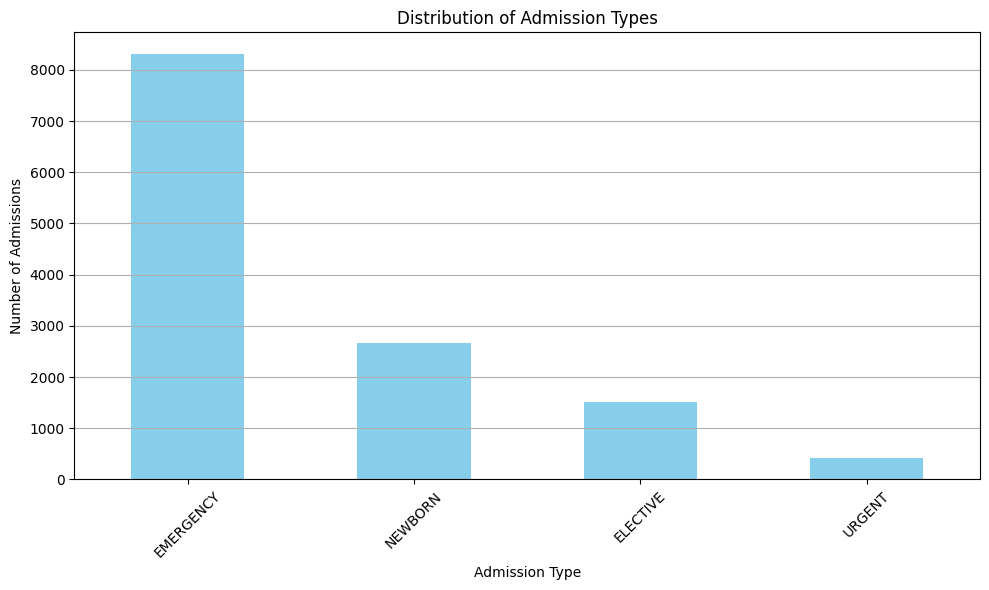

In [7]:
admission_type_counts = admissions['ADMISSION_TYPE'].value_counts()

# Plot the counts as a bar plot
plt.figure(figsize=(10, 6))
admission_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

#### 1.3 What is the predominant discharge destination for admitted patients?

In [8]:
#Step 1: Count occurrences of each discharge location
discharge_location_counts = admissions['DISCHARGE_LOCATION'].value_counts()

# Step 2: Identify the discharge location with the highest count
most_used_discharge_location = discharge_location_counts.idxmax()

print(f"The discharge location mostly used for admitted patients is: {most_used_discharge_location}")

The discharge location mostly used for admitted patients is: HOME


#### 1.4 Following emergency, elective, or urgent admissions, what is the secondary discharge destination commonly observed?

In [9]:
# Step 1: Filter to include only admitted patients (emergency, elective, urgent)
admitted_patients = admissions[admissions['ADMISSION_TYPE'].isin(['EMERGENCY', 'ELECTIVE', 'URGENT'])]

# Step 2: Count occurrences of each discharge location
discharge_location_counts = admitted_patients['DISCHARGE_LOCATION'].value_counts()

# Step 3: Find the second most common discharge location
second_most_used_discharge_location = discharge_location_counts.index[1]

print(f"The second most used discharge location for admitted patients is: {second_most_used_discharge_location}")

The second most used discharge location for admitted patients is: HOME HEALTH CARE


#### Let's read another table

In [10]:
patients = pd.read_csv(os.path.join(base_path,"ICUSTAYS/ICUSTAYS_sorted.csv"))
patients.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,1,2,163353,243653,carevue,NICU,NICU,56,56,2138-07-17 21:20:07,2138-07-17 23:32:21,0.0918
1,2,3,145834,211552,carevue,MICU,MICU,12,12,2101-10-20 19:10:11,2101-10-26 20:43:09,6.0646
2,3,4,185777,294638,carevue,MICU,MICU,52,52,2191-03-16 00:29:31,2191-03-17 16:46:31,1.6785
3,4,5,178980,214757,carevue,NICU,NICU,56,56,2103-02-02 06:04:24,2103-02-02 08:06:00,0.0844
4,5,6,107064,228232,carevue,SICU,SICU,33,33,2175-05-30 21:30:54,2175-06-03 13:39:54,3.6729


#### 1.5 Show me three most commonly used First Care Units for admitting patients?

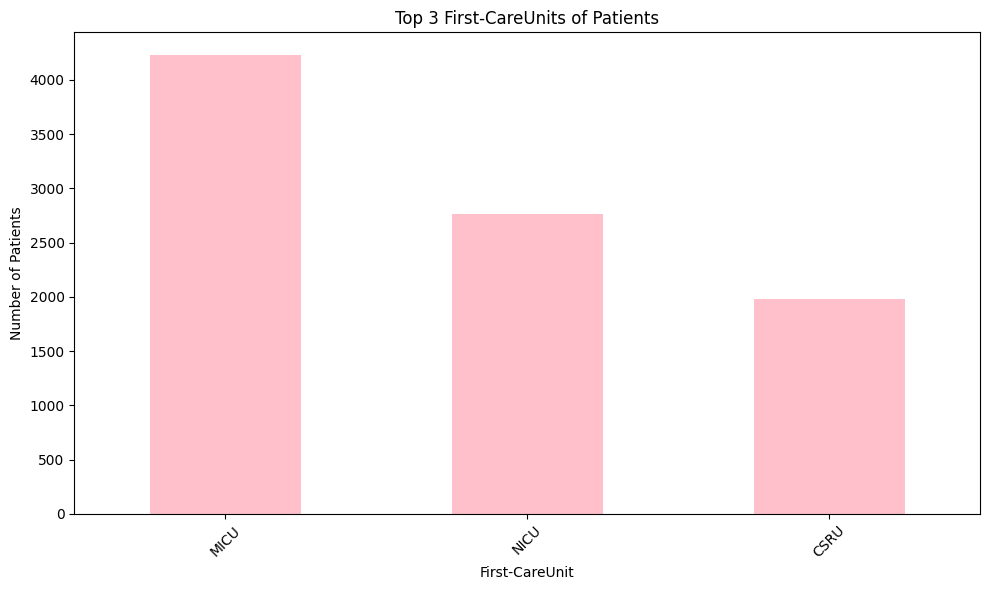

In [11]:

top_3_first_careunits = patients['FIRST_CAREUNIT'].value_counts().head(3)

# Plot the top 10 First-CareUnits using pandas plot
plt.figure(figsize=(10, 6))
top_3_first_careunits.plot(kind='bar', color='pink')
plt.title('Top 3 First-CareUnits of Patients')
plt.xlabel('First-CareUnit')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## 2. Hospital Record System

#### 2.1 How many patients have abnormal Blood Glucose?

##### 2.1.1 Read the relevant tables

In [12]:
d_labitems = pd.read_csv(os.path.join(base_path,"D_LABITEMS/D_LABITEMS.csv"))
d_labitems.head(5)

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [13]:
labevents = pd.read_csv(os.path.join(base_path,"LABEVENTS/LABEVENTS_random.csv"))
labevents.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,1,2,163353.0,51143,2138-07-17 20:48:00,0,0.0,%,NaN
1,2,2,163353.0,51144,2138-07-17 20:48:00,0,0.0,%,NaN
2,3,2,163353.0,51146,2138-07-17 20:48:00,0,0.0,%,NaN
3,4,2,163353.0,51200,2138-07-17 20:48:00,0,0.0,%,NaN
4,5,2,163353.0,51221,2138-07-17 20:48:00,0,0.0,%,abnormal


##### 2.1.2 Identify the ITEMID(s) for 'Blood Glucose' in d_labitems

In [14]:
item_ids = d_labitems[(d_labitems['LABEL'].str.lower() == 'glucose') & (d_labitems['FLUID'].str.lower() == 'blood')]['ITEMID'].unique()
d_labitems[d_labitems.ITEMID.isin(item_ids)]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
136,10,50809,Glucose,Blood,Blood Gas,2339-0
258,132,50931,Glucose,Blood,Chemistry,2345-7


##### 2.1.3  Filter lab events to keep only records with the identified ITEMID(s)

In [15]:
# Step 2: Filter lab events to keep only records with the identified ITEMID(s)
bg_events = labevents[labevents['ITEMID'].isin(item_ids)]
bg_events

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
68,3771,6,107064.0,50931,2175-06-06 05:00:00,117,117.0,mg/dL,abnormal
126,4543,6,NaN,50931,2175-10-03 08:40:00,112,112.0,mg/dL,abnormal
181,4598,6,NaN,50931,2175-11-27 09:15:00,110,110.0,mg/dL,abnormal
262,3814,6,107064.0,50931,2175-06-07 05:00:00,98,98.0,mg/dL,NaN
285,3837,6,107064.0,50931,2175-06-08 05:00:00,120,120.0,mg/dL,abnormal
...,...,...,...,...,...,...,...,...,...
6089524,27762975,98994,178949.0,50931,2137-08-25 22:35:00,104,104.0,mg/dL,abnormal
6089546,27762997,98994,178949.0,50809,2137-08-25 22:51:00,102,102.0,mg/dL,NaN
6089561,27763012,98994,178949.0,50809,2137-08-26 04:56:00,101,101.0,mg/dL,NaN
6089572,27763023,98994,178949.0,50809,2137-08-26 10:29:00,99,99.0,mg/dL,NaN


##### 2.1.4 Filter abnormal values

In [16]:
bg_events = bg_events[bg_events["FLAG"] == "abnormal"]
bg_events

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
68,3771,6,107064.0,50931,2175-06-06 05:00:00,117,117.0,mg/dL,abnormal
126,4543,6,NaN,50931,2175-10-03 08:40:00,112,112.0,mg/dL,abnormal
181,4598,6,NaN,50931,2175-11-27 09:15:00,110,110.0,mg/dL,abnormal
285,3837,6,107064.0,50931,2175-06-08 05:00:00,120,120.0,mg/dL,abnormal
378,3930,6,107064.0,50931,2175-06-12 04:54:00,135,135.0,mg/dL,abnormal
...,...,...,...,...,...,...,...,...,...
6089365,27806622,99291,186413.0,50809,2120-09-02 09:37:00,109,109.0,mg/dL,abnormal
6089393,27765286,98994,132172.0,50931,2137-10-30 13:59:00,118,118.0,mg/dL,abnormal
6089450,27765343,98994,161559.0,50931,2138-06-27 01:17:00,131,131.0,mg/dL,abnormal
6089524,27762975,98994,178949.0,50931,2137-08-25 22:35:00,104,104.0,mg/dL,abnormal


##### 2.1.5  Filter unique patients

In [17]:
bg_events.groupby('SUBJECT_ID').first().reset_index()

,SUBJECT_ID,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,6,3771,107064.0,50931,2175-06-06 05:00:00,117,117.0,mg/dL,abnormal
1,13,6990,143045.0,50809,2167-01-09 20:08:00,158,158.0,mg/dL,abnormal
2,35,14070,166707.0,50809,2122-02-11 03:13:00,124,124.0,mg/dL,abnormal
3,62,29867,116009.0,50931,2113-02-14 20:20:00,125,125.0,mg/dL,abnormal
4,64,31018,172056.0,50931,2143-06-24 05:15:00,117,117.0,mg/dL,abnormal
...,...,...,...,...,...,...,...,...,...
8268,99881,27896114,172327.0,50931,2174-01-22 07:49:00,121,121.0,mg/dL,abnormal
8269,99893,27896706,128349.0,50931,2193-04-01 16:07:00,156,156.0,mg/dL,abnormal
8270,99923,27900039,164914.0,50931,2201-03-03 03:50:00,105,105.0,mg/dL,abnormal
8271,99936,27901191,107913.0,50931,2182-10-11 11:05:00,130,130.0,mg/dL,abnormal


#### 2.2 What are the top 5 chronic diseases and their count?

##### 2.2.1 Read Relevant Tables

In [18]:
d_icd_diagnosis = pd.read_csv(os.path.join(base_path,"D_ICD_DIAGNOSES/D_ICD_DIAGNOSES.csv"))
d_icd_diagnosis.head(5)

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [19]:
diagnosis_icd = pd.read_csv(os.path.join(base_path,"DIAGNOSES_ICD/DIAGNOSES_ICD_random.csv"))
diagnosis_icd.head(5)

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1488,112,174105,1.0,53100
1,1489,112,174105,2.0,41071
2,1490,112,174105,3.0,2859
3,1491,112,174105,4.0,41401
4,1492,112,174105,5.0,725


##### 2.2.2 Identify icd9 codes with chronic in short title or long title


In [20]:
chronic_icd9_codes = d_icd_diagnosis[(d_icd_diagnosis['SHORT_TITLE'].str.lower().str.contains("chronic")) | (d_icd_diagnosis['LONG_TITLE'].str.lower().str.contains("chronic"))]['ICD9_CODE'].unique()
d_icd_diagnosis[d_icd_diagnosis.ICD9_CODE.isin(chronic_icd9_codes)]

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
93,266,0061,Chr amebiasis w/o absces,Chronic intestinal amebiasis without mention o...
411,462,0982,Chr gc infect lower gu,"Gonococcal infection, chronic, of lower genito..."
412,463,09830,Chr gc upper gu NOS,Chronic gonococcal infection of upper genitour...
413,464,09831,"Gc cystitis, chronic","Gonococcal cystitis, chronic"
414,465,09832,"Gc prostatitis, chronic","Gonococcal prostatitis, chronic"
...,...,...,...,...
11042,13847,73017,Chr osteomyelit-ankle,"Chronic osteomyelitis, ankle and foot"
11043,13848,73018,Chr osteomyelit NEC,"Chronic osteomyelitis, other specified sites"
11044,13849,73019,Chr osteomyelit-mult,"Chronic osteomyelitis, multiple sites"
11759,12375,99762,Infection amputat stump,Infection (chronic) of amputation stump


##### 2.2.3 Identify relevant diagnosis with the filtered icd9 codes


In [21]:
chronic_diagnosis = diagnosis_icd[diagnosis_icd["ICD9_CODE"].isin(chronic_icd9_codes)]
chronic_diagnosis

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
33,1630,125,157348,4.0,4168
42,1712,135,199634,3.0,496
51,627,78,100536,3.0,07054
62,698,87,190659,5.0,7707
87,25,6,107064,1.0,40391
...,...,...,...,...,...
140459,637067,96908,138027,12.0,28521
140465,637073,96908,149629,2.0,42833
140466,637074,96908,149629,3.0,40391
140469,637077,96908,149629,6.0,5855


##### 2.2.4 Filter Top 5 diagnosis and count

In [22]:

chronic_diagnosis_count = chronic_diagnosis.groupby("ICD9_CODE")["SUBJECT_ID"].count().sort_values(ascending=False).head(5)
chronic_diagnosis_count

ICD9_CODE
496      981
40390    713
5859     712
40391    609
4168     453
Name: SUBJECT_ID, dtype: int64

##### 2.2.5 Combine Count and Title

In [23]:
# d_icd_diagnosis[d_icd_diagnosis.ICD9_CODE.isin(chronic_diagnosis_count.index.to_list())].reset_index(drop=True)
chronic_diagnosis_and_count = d_icd_diagnosis.join(chronic_diagnosis_count,  on="ICD9_CODE").sort_values("SUBJECT_ID", ascending=False).head(5)
chronic_diagnosis_and_count

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE,SUBJECT_ID
5394,5123,496,Chr airway obstruct NEC,"Chronic airway obstruction, not elsewhere clas...",981.0
4314,4315,40390,Hy kid NOS w cr kid I-IV,"Hypertensive chronic kidney disease, unspecifi...",713.0
5913,5915,5859,Chronic kidney dis NOS,"Chronic kidney disease, unspecified",712.0
4315,4316,40391,Hyp kid NOS w cr kid V,"Hypertensive chronic kidney disease, unspecifi...",609.0
4397,4398,4168,Chr pulmon heart dis NEC,Other chronic pulmonary heart diseases,453.0


##### 2.2.6 Show Counts

<Figure size 1000x600 with 0 Axes>

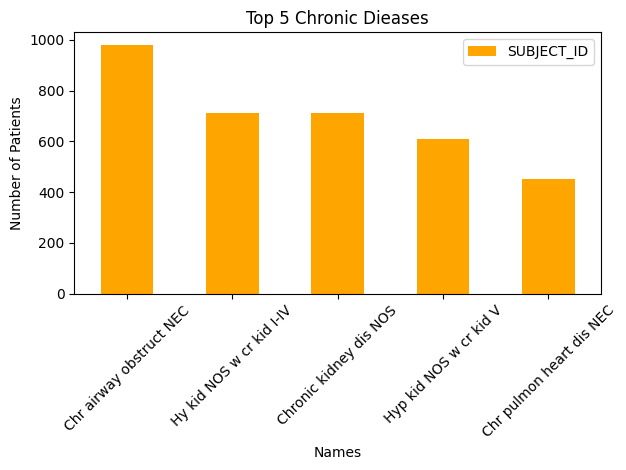

In [24]:
plt.figure(figsize=(10, 6))
chronic_diagnosis_and_count[["SHORT_TITLE", "SUBJECT_ID"]].set_index("SHORT_TITLE").plot(kind='bar', color='orange')
plt.title('Top 5 Chronic Dieases')
plt.xlabel('Names')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### 2.3 What are the top 5 acute diseases and their count?

<Figure size 1000x600 with 0 Axes>

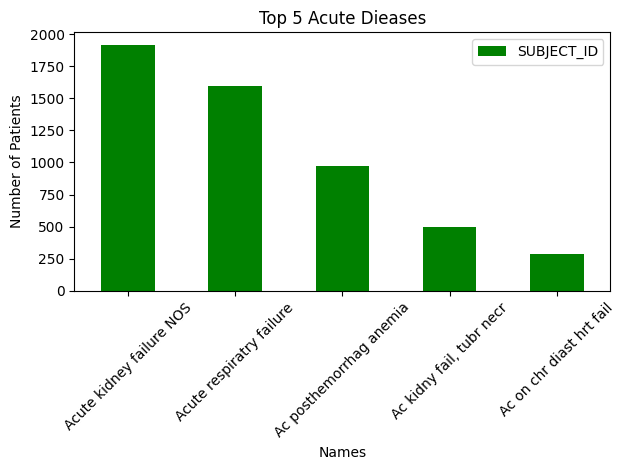

In [25]:
## Read Relevant Tables
d_icd_diagnosis = pd.read_csv(os.path.join(base_path,"D_ICD_DIAGNOSES/D_ICD_DIAGNOSES.csv"))
diagnosis_icd = pd.read_csv(os.path.join(base_path,"DIAGNOSES_ICD/DIAGNOSES_ICD_random.csv"))


## Identify icd9 codes with acute in short title or long title
acute_icd9_codes = d_icd_diagnosis[(d_icd_diagnosis['SHORT_TITLE'].str.lower().str.contains("acute")) | (d_icd_diagnosis['LONG_TITLE'].str.lower().str.contains("acute"))]['ICD9_CODE'].unique()

## Identify the relevant diagnosis
acute_diagnosis = diagnosis_icd[diagnosis_icd["ICD9_CODE"].isin(acute_icd9_codes)]

## Find top 5 diseases and their count
acute_diagnosis_count = acute_diagnosis.groupby("ICD9_CODE")["SUBJECT_ID"].count().sort_values(ascending=False).head(5)
acute_diagnosis_count = d_icd_diagnosis.join(acute_diagnosis_count,  on="ICD9_CODE").sort_values("SUBJECT_ID", ascending=False).head(5)


plt.figure(figsize=(10, 6))
acute_diagnosis_count[["SHORT_TITLE", "SUBJECT_ID"]].set_index("SHORT_TITLE").plot(kind='bar', color='green')
plt.title('Top 5 Acute Dieases')
plt.xlabel('Names')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()

plt.show()

## Assignment


### 1. How many patients are suffering from diabetes? 
### 2. How many patients are taking metformin?
### 3. How many patients are prescribed with Insulin?
### 4. How many implant procedures were performed? (Use keyword: implant)
### 5. Show me patients with abnormal PH value?

In [26]:
### 1. How many patients are suffering from diabetes? 


In [27]:
### 2. How many patients are taking metformin?


In [28]:
### 3. How many patients are prescribed with Insulin?


In [29]:
### 4. How many implant procedures were performed? (Use keyword: implant)


In [30]:
### 5. Show me patients with abnormal PH value?
d_labitems = pd.read_csv(os.path.join(base_path,"D_LABITEMS/D_LABITEMS.csv"))
#print(d_labitems.head(5))
labevents = pd.read_csv(os.path.join(base_path,"LABEVENTS/LABEVENTS_random.csv"))
#labevents.head(5)
# Step 1
item_ids = d_labitems[(d_labitems['LABEL'].str.lower() == 'ph') & (d_labitems['FLUID'].str.lower() == 'blood')]['ITEMID'].unique()
d_labitems[d_labitems.ITEMID.isin(item_ids)]
# Step 2: Filter lab events to keep only records with the identified ITEMID(s)
bg_events = labevents[labevents['ITEMID'].isin(item_ids)]
bg_events
bg_events = bg_events[bg_events["FLAG"] == "abnormal"]
bg_events
bg_events.groupby('SUBJECT_ID').first().reset_index()

,SUBJECT_ID,ROW_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,6,3512,107064.0,50820,2175-05-30 13:12:00,7.25,7.25,units,abnormal
1,13,6999,143045.0,50820,2167-01-09 22:05:00,7.33,7.33,units,abnormal
2,35,14073,166707.0,50820,2122-02-11 03:13:00,7.31,7.31,units,abnormal
3,71,34733,111944.0,50820,2164-02-03 21:07:00,7.33,7.33,units,abnormal
4,103,47476,130744.0,50820,2144-08-14 10:44:00,7.50,7.50,units,abnormal
...,...,...,...,...,...,...,...,...,...
5063,99783,27878499,126090.0,50820,2125-12-04 01:37:00,7.24,7.24,units,abnormal
5064,99847,27891324,155024.0,50820,2191-04-13 02:20:00,7.46,7.46,units,abnormal
5065,99863,27892804,100749.0,50820,2142-04-13 10:57:00,7.47,7.47,units,abnormal
5066,99881,27896106,172327.0,50820,2174-01-22 03:20:00,7.05,7.05,units,abnormal
